# Task 1.1

In [3]:
import numpy as np
import glob
from PIL import Image
from matplotlib import pyplot as plt

Creating numpyArray

In [4]:
#rezise images and prepare for 
n = 0 #Number of samples 
images = glob.glob("fruits/*.jpg")
newImages = []
wantedX = 28
wantedY = 28

#add data to an array
for img in images: 
    n+=1
    img = Image.open(img)
    newImg = img.resize((wantedX,wantedY))
    newImages.append([newImg])

#store as a numpy array
numpyArr_fruits = np.array(newImages, dtype=np.uint8)
numpyArr_fruits = normalize_image(numpyArr_fruits) #normalization further down
np.save('samples.npy', numpyArr_fruits)
numpyArr_fruits.shape

NameError: name 'normalize_image' is not defined

Creating PlotSample method

In [ ]:

def PlotSample(numpyArray, i):
    color_image = numpyArray[i][0]
    plt.imshow(color_image)
    plt.show()


def plot_images_in_grid(images):
    num_rows = 5
    num_cols = 5

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))

    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            if index < len(images):
                ax = axes[i, j]
                image = images[index][0]
                    
                # Normalize the image if it's not in the [0, 1] range
                if image.min() < 0 or image.max() > 1:
                    image = (image - image.min()) / (image.max() - image.min())
                
                ax.imshow(image)
               # print(image.shape, "Index of picture ", index ," The [",i,"",j,"] image.")
                ax.axis('off')
    plt.tight_layout()
    plt.show()

The preprocessing

In [ ]:
#nomralize values to float range [0, 1]
def normalize_image(images):
    images = images.astype('float32')
    images /=255.0
    return images

#Mean normalization
def center(matrix):
    numpyArr = matrix - np.mean(matrix, axis = 0)
    return numpyArr

#Standardization 
def standardize(matrix):
    numpyArr = center(matrix)/np.std(matrix, axis = 0)
    return numpyArr    

#Decorrelate for whithen method
def decorrelate(X):
    XCentered = center(X)
    cov = XCentered.T.dot(XCentered)/float(XCentered.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    return decorrelated

def whitening(images):
    original_shape = images.shape
    flattened_images = images.reshape(original_shape[0], -1)
    
    # Step 1: Center the data by subtracting the mean
    mean = np.mean(flattened_images, axis=0)
    centered_images = flattened_images - mean

    # Step 2: Calculate the covariance matrix
    covariance_matrix = np.cov(centered_images, rowvar=False)

    # Step 3: Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort eigenvalues in descending order and corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Whitening transformation
    whitened = np.dot(centered_images, eigenvectors)
    whitened /= np.sqrt(eigenvalues + 1e-6)  # Add a small constant to avoid division by zero
    
    # Step 6: Inverse whitening transformation
    reconstructed = np.dot(whitened, eigenvectors.T)
    reconstructed = reconstructed + mean
    
    return reconstructed.reshape(original_shape)


Main

raw data


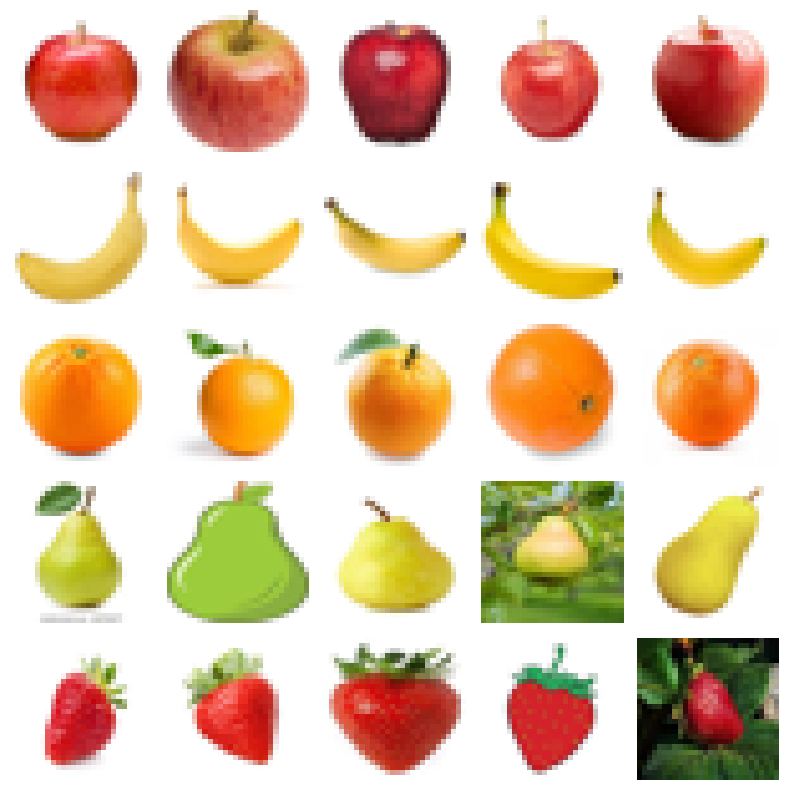

center


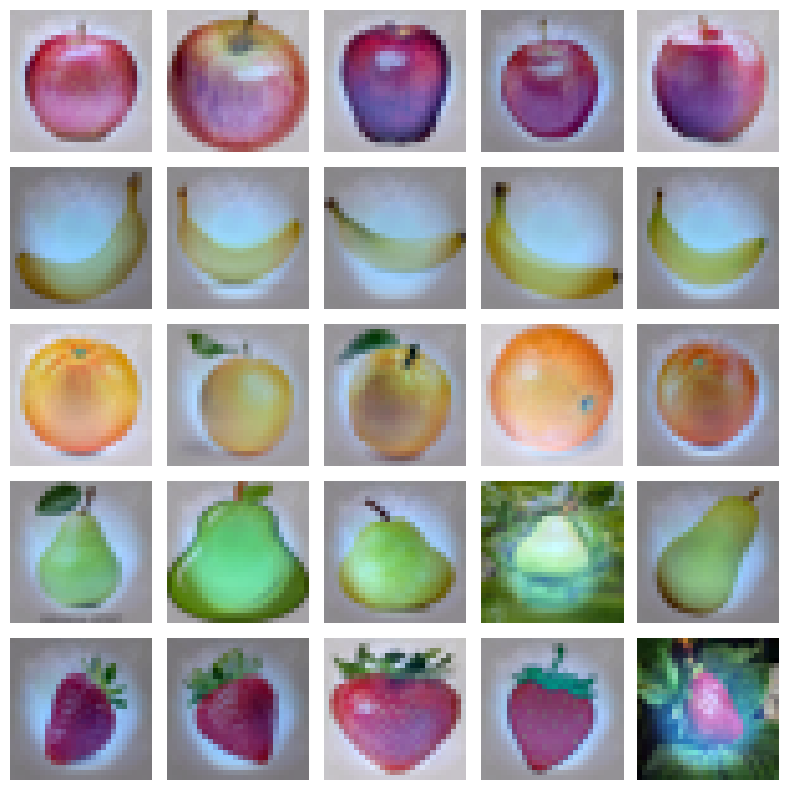

standardize


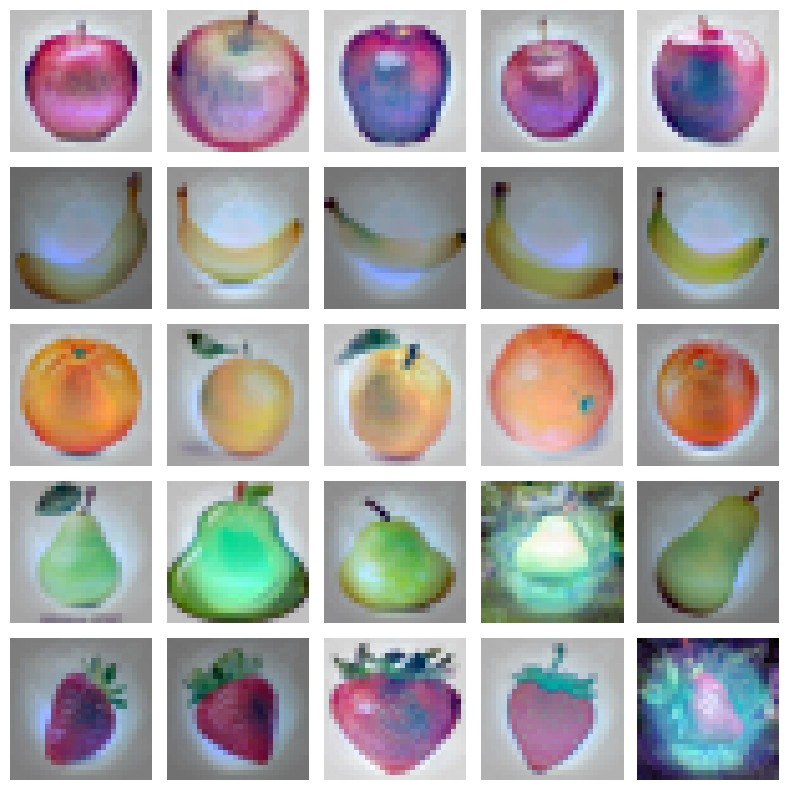

whiten


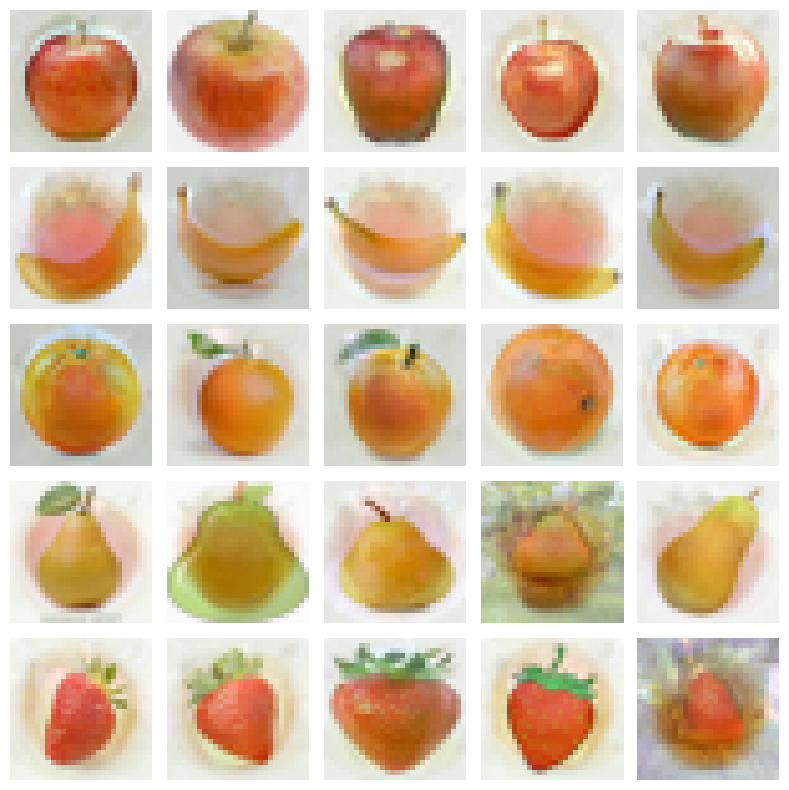

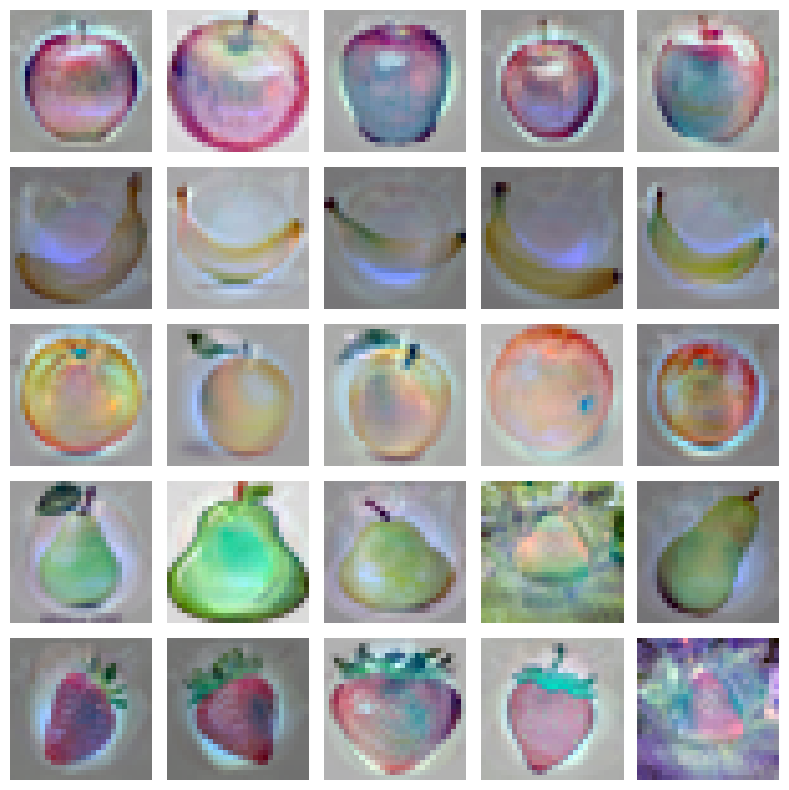

In [ ]:
numpyArr = np.load("samples.npy")
#PlotSample(numpyArr, 0) #one raw sample of the collected data
print("raw data")
plot_images_in_grid(numpyArr)
print("center")
plot_images_in_grid(center(numpyArr))
print("standardize")
plot_images_in_grid(standardize(numpyArr))
print("whiten")
plot_images_in_grid(whitening(numpyArr))
plot_images_in_grid(whitening(standardize(center(numpyArr))))

# Task 1.2

Main

In [ ]:

#task 1.2
import numpy as np
import matplotlib.pyplot as plt
import random

labels = []
embeddings = []
npDataArrays = np.load("vecs.npy", allow_pickle=True).item() #task 2.1.1

def getPos(npDataArrays, number): #task 2.1.2
    numberPos = list(npDataArrays.keys())[number]
    return npDataArrays[numberPos]

def getNumber(npPosDataArray, number): #task 2.1.2
    numberKey = list(npPosDataArray.keys())[number]
    return np.array(npPosDataArray[number])

def getEmbeddings(npPosDataArray):
    labels = np.array([list(npPosDataArray.keys())[i] for i in range(10)])
    embeddings = [getNumber(npPosDataArray, i) for i in range(10)]
    return labels, embeddings #task 2.1.2

def permuteData(labels, numbers): #task 2.1.3
    prem = np.random.permutation(len(labels))
    labels = labels[prem]
    embeddings = [numbers[i] for i in prem]
    return labels, embeddings

firstPos = getPos(npDataArrays, 0)   
labels, embeddings = getEmbeddings(firstPos)

#Sorted
print(labels)   
print(embeddings[0])

labels, embeddings = permuteData(labels, embeddings) 

#Unsorted task 2.1.3
print(labels)   
print(embeddings[0])

[0 1 2 3 4 5 6 7 8 9]
[[-0.       -0.       -0.       ... -0.       -0.        9.227847]
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]
 ...
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]
 [-0.       -0.       42.14771  ... -0.       -0.       -0.      ]
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]]
[6 5 1 0 2 4 3 7 9 8]
[[-0.       -0.       27.485811 ... -0.       -0.       -0.      ]
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]
 ...
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]]


# Task 2.1


In [ ]:
from keras.datasets import mnist

In [ ]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [ ]:
Xtr.shape

(60000, 28, 28)

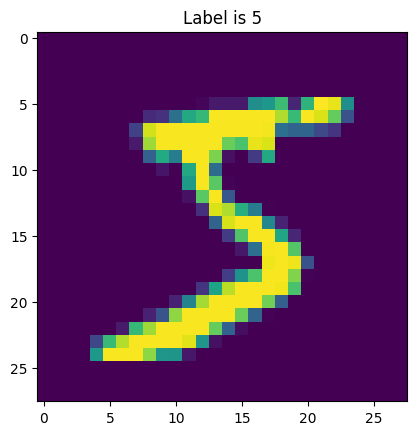

In [ ]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


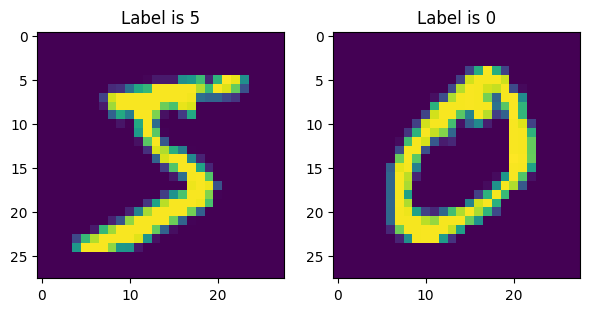

In [ ]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(7,7))
ax0=plt.subplot(1,2,1)
ax1=plt.subplot(1,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [ ]:
28*28

784

In [ ]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

#bug was in the code line below
#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])
Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(int) 

Tr_set.shape

(500, 784)

In [ ]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

def predictL2(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances = np.sqrt(np.sum((Tr_set - X[i, :])**2, axis=1))  #Added euclidian distance
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index] 
    return Lpred

def predictKNN(X, k):
    num_test = X.shape[0]
    Lpred = np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances = np.sqrt(np.sum((Tr_set - X[i, :])**2, axis=1))
        indices = np.argsort(distances)  
        
        k_nearest_labels = Ltr_set[indices[:k]]
        
        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
        most_common_label = unique_labels[np.argmax(counts)]
        
        Lpred[i] = most_common_label
    
    return Lpred

In [ ]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])

Labels_predicted=predict(Test_images)
Labels_predictedL2 = predictL2(Test_images)
Labels_predictedKNN = predictKNN(Test_images, 2)

print("Accuracy L1:", np.mean(Labels_predicted==L_test))
print("Accuracy L2:", np.mean(Labels_predictedL2==L_test))
print("Accuracy KNN, K = 2:", np.mean(Labels_predictedKNN==L_test))

# 2.1 tasks below
# 1.BEFORE any changes we had approx 0.265 accuracy
# 2. L_2 give an accuracy of 0.19
# 3. the bug thing (mby need to explain why) new scores: Accuracy L1: 0.811 , Accuracy L2: 0.8294
# 4. have a look at preditKNN() above

Accuracy L1: 0.811
Accuracy L2: 0.8294
Accuracy KNN, K = 2: 0.8037


# Task 2.2

# Task 2.2

In [ ]:
import numpy as np


def predictionEucidianKNN(X, X_train, y_train, k):#We need to take into onsideration the k nearest points. 
    num_test = X.shape[0]
    predicted_labels = np.zeros(num_test, dtype=y_train.dtype)

    for i in range(num_test):
        distances = np.sqrt(np.sum(np.square(X_train - X[i, :]), axis=1))
        k_nearest_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train[k_nearest_indices]
        predicted_labels[i] = np.bincount(k_nearest_labels).argmax()#Voting is done and set the predicted label on index i

    return predicted_labels
    
def cross_validation(X, y, k_values, num_folds=3):
    fold_size = len(X) // num_folds
    bestAccuracy = {} #Dictionary to map best k-value accuracy

    for k in k_values:
        guessRate = []
        for fold in range(num_folds):
            val_start = fold * fold_size
            val_end = (fold + 1) * fold_size

            X_train = np.concatenate([X[:val_start], X[val_end:]])
            y_train = np.concatenate([y[:val_start], y[val_end:]])
            X_val = X[val_start:val_end]
            y_val = y[val_start:val_end]

            y_pred = predictionEucidianKNN(X_val, X_train, y_train, k)
            accuracy = np.mean(y_pred == y_val)
            guessRate.append(accuracy)

        bestAccuracy[k] = np.mean(guessRate)
        print(f"Accuracy k={k}: {bestAccuracy[k]}")

    best_k = max(bestAccuracy, key=bestAccuracy.get)
    return best_k

#Seems like higher k-value creates lower prediction...
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
best_k = cross_validation(Tr_set, Ltr_set, k_values)
print(f"Best value from crossvalidating is: {best_k}")

Accuracy k=1: 0.8333333333333334
Accuracy k=3: 0.8232931726907631
Accuracy k=5: 0.8152610441767069
Accuracy k=7: 0.8012048192771085
Accuracy k=9: 0.7971887550200804
Accuracy k=11: 0.7831325301204819
Accuracy k=13: 0.7610441767068273
Accuracy k=15: 0.7550200803212852
Best value from crossvalidating is: 1


# Task 3.1

In [6]:
#task 3.1.1

from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


# Load the Iris dataset and split the data 
iris = datasets.load_iris()
X = iris.data #features
y = iris.target #labels
y_names = iris.target_names #class names ie label names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42) #split the data, random_state keeps the split reproducible

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(120, 4) (30, 4) (120,) (30,)


In [7]:
#set up the different kernels with (one vs one) and (one vs rest) decision functions
linear_1v1 = svm.SVC(kernel = "linear", decision_function_shape = "ovo").fit(X_train, y_train)
linear_1vRest = svm.SVC(kernel = "linear", decision_function_shape = "ovr").fit(X_train, y_train)

poly_1v1 = svm.SVC(kernel="poly", decision_function_shape="ovo").fit(X_train, y_train)
poly_1vRest = svm.SVC(kernel="poly", decision_function_shape="ovr").fit(X_train, y_train)

rbf_1v1 = svm.SVC(kernel="rbf", decision_function_shape="ovo").fit(X_train, y_train)
rbf_1vRest = svm.SVC(kernel="rbf", decision_function_shape="ovr").fit(X_train, y_train)


#confusion matrices
linear_1v1_pred = linear_1v1.predict(X_test)
confusion_linear_1v1 = confusion_matrix(y_test, linear_1v1_pred)
print("Confusion Matrix (Linear 1v1 Kernel SVM):")
print(confusion_linear_1v1)

linear_1vRest_pred = linear_1vRest.predict(X_test)
confusion_linear_1vRest = confusion_matrix(y_test, linear_1vRest_pred)
print("Confusion Matrix (Linear 1vRest Kernel SVM):")
print(confusion_linear_1vRest)

poly_1v1_pred = poly_1v1.predict(X_test)
confusion_poly_1v1 = confusion_matrix(y_test, poly_1v1_pred)
print("Confusion Matrix (Polynomial 1v1 Kernel SVM):")
print(confusion_poly_1v1)

poly_1vRest_pred = poly_1vRest.predict(X_test)
confusion_poly_1vRest = confusion_matrix(y_test, poly_1vRest_pred)
print("Confusion Matrix (Polynomial 1vRest Kernel SVM):")
print(confusion_poly_1vRest)

rbf_1v1_pred = rbf_1v1.predict(X_test)
confusion_rbf_1v1 = confusion_matrix(y_test, rbf_1v1_pred)
print("Confusion Matrix (RBF 1v1 Kernel SVM):")
print(confusion_rbf_1v1)

rbf_1vRest_pred = rbf_1vRest.predict(X_test)
confusion_rbf_1vRest = confusion_matrix(y_test, rbf_1vRest_pred)
print("Confusion Matrix (RBF 1vRest Kernel SVM):")
print(confusion_rbf_1vRest)

confusion_matrices = {
    "linear_1v1": (accuracy_score(y_test, linear_1v1_pred), f1_score(y_test, linear_1v1_pred, average='weighted')),
    "linear_1vRest": (accuracy_score(y_test, linear_1vRest_pred), f1_score(y_test, linear_1vRest_pred, average='weighted')),
    "poly_1v1": (accuracy_score(y_test, poly_1v1_pred), f1_score(y_test, poly_1v1_pred, average='weighted')),
    "poly_1vRest": (accuracy_score(y_test, poly_1vRest_pred), f1_score(y_test, poly_1vRest_pred, average='weighted')),
    "rbf_1v1": (accuracy_score(y_test, rbf_1v1_pred), f1_score(y_test, rbf_1v1_pred, average='weighted')),
    "rbf_1vRest": (accuracy_score(y_test, rbf_1vRest_pred), f1_score(y_test, rbf_1vRest_pred, average='weighted'))
}


Confusion Matrix (Linear 1v1 Kernel SVM):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Confusion Matrix (Linear 1vRest Kernel SVM):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Confusion Matrix (Polynomial 1v1 Kernel SVM):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Confusion Matrix (Polynomial 1vRest Kernel SVM):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Confusion Matrix (RBF 1v1 Kernel SVM):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Confusion Matrix (RBF 1vRest Kernel SVM):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


3.2 Using which kernel the best accuracy and F1 score is achieved?

In [8]:
best_accuracy_kernel = max(confusion_matrices, key=lambda k: confusion_matrices[k][0])
best_f1_score_kernel = max(confusion_matrices, key=lambda k: confusion_matrices[k][1])

print(f"Best Accuracy using {best_accuracy_kernel} with score {confusion_matrices[best_accuracy_kernel][0]:.2f}")
print(f"Best F1 Score using {best_f1_score_kernel} with score {confusion_matrices[best_f1_score_kernel][1]:.2f}")

Best Accuracy using linear_1v1 with score 1.00
Best F1 Score using linear_1v1 with score 1.00


3.3 Extract the support vectors for each class in one-vs-rest training case.

In [9]:

classifiers = [linear_1vRest, poly_1vRest, rbf_1vRest]
kernel_types = ["Linear", "Poly", "RBF"]

for i in range(len(classifiers)):
    clf = classifiers[i]
    kernel_type = kernel_types[i]
    
    print(f"\nSupport Vectors for {kernel_type} Kernel (One-vs-Rest):")
    
    # Extract support vectors
    sv = clf.support_vectors_
    
    # Extract support vector labels
    sv_labels = np.sign(clf.dual_coef_[0])
    
    for class_id in range(len(classifiers)):
        # Extract support vectors for the current class
        class_sv = sv[sv_labels == (class_id - 1)]
        
        print(f"\nClass {class_id} ({y_names[class_id]}):")
        print(class_sv)


Support Vectors for Linear Kernel (One-vs-Rest):

Class 0 (setosa):
[[5.1 2.5 3.  1.1]
 [4.9 2.5 4.5 1.7]]

Class 1 (versicolor):
[[4.8 3.4 1.9 0.2]
 [5.6 3.  4.5 1.5]
 [5.4 3.  4.5 1.5]
 [6.7 3.  5.  1.7]
 [5.9 3.2 4.8 1.8]
 [6.  2.7 5.1 1.6]
 [6.3 2.5 4.9 1.5]
 [6.1 2.9 4.7 1.4]
 [6.5 2.8 4.6 1.5]
 [6.9 3.1 4.9 1.5]
 [6.3 2.3 4.4 1.3]
 [6.3 2.5 5.  1.9]
 [6.3 2.8 5.1 1.5]
 [6.3 2.7 4.9 1.8]
 [6.  3.  4.8 1.8]
 [6.  2.2 5.  1.5]
 [6.2 2.8 4.8 1.8]
 [6.5 3.  5.2 2. ]
 [7.2 3.  5.8 1.6]
 [5.6 2.8 4.9 2. ]
 [5.9 3.  5.1 1.8]]

Class 2 (virginica):
[[5.1 3.3 1.7 0.5]
 [4.5 2.3 1.3 0.3]]

Support Vectors for Poly Kernel (One-vs-Rest):

Class 0 (setosa):
[[5.1 2.5 3.  1.1]
 [4.9 2.5 4.5 1.7]]

Class 1 (versicolor):
[[5.1 3.8 1.9 0.4]
 [4.8 3.4 1.9 0.2]
 [5.6 3.  4.5 1.5]
 [5.4 3.  4.5 1.5]
 [6.7 3.  5.  1.7]
 [5.9 3.2 4.8 1.8]
 [6.  2.7 5.1 1.6]
 [6.3 2.5 4.9 1.5]
 [6.3 2.3 4.4 1.3]
 [6.3 2.8 5.1 1.5]
 [6.3 2.7 4.9 1.8]
 [6.  3.  4.8 1.8]
 [6.2 2.8 4.8 1.8]
 [7.2 3.  5.8 1.6]
 [5.9 3.  5.1

3.4 Plot the decision boundary for features 2 vs. 3 and 3 vs. 4.

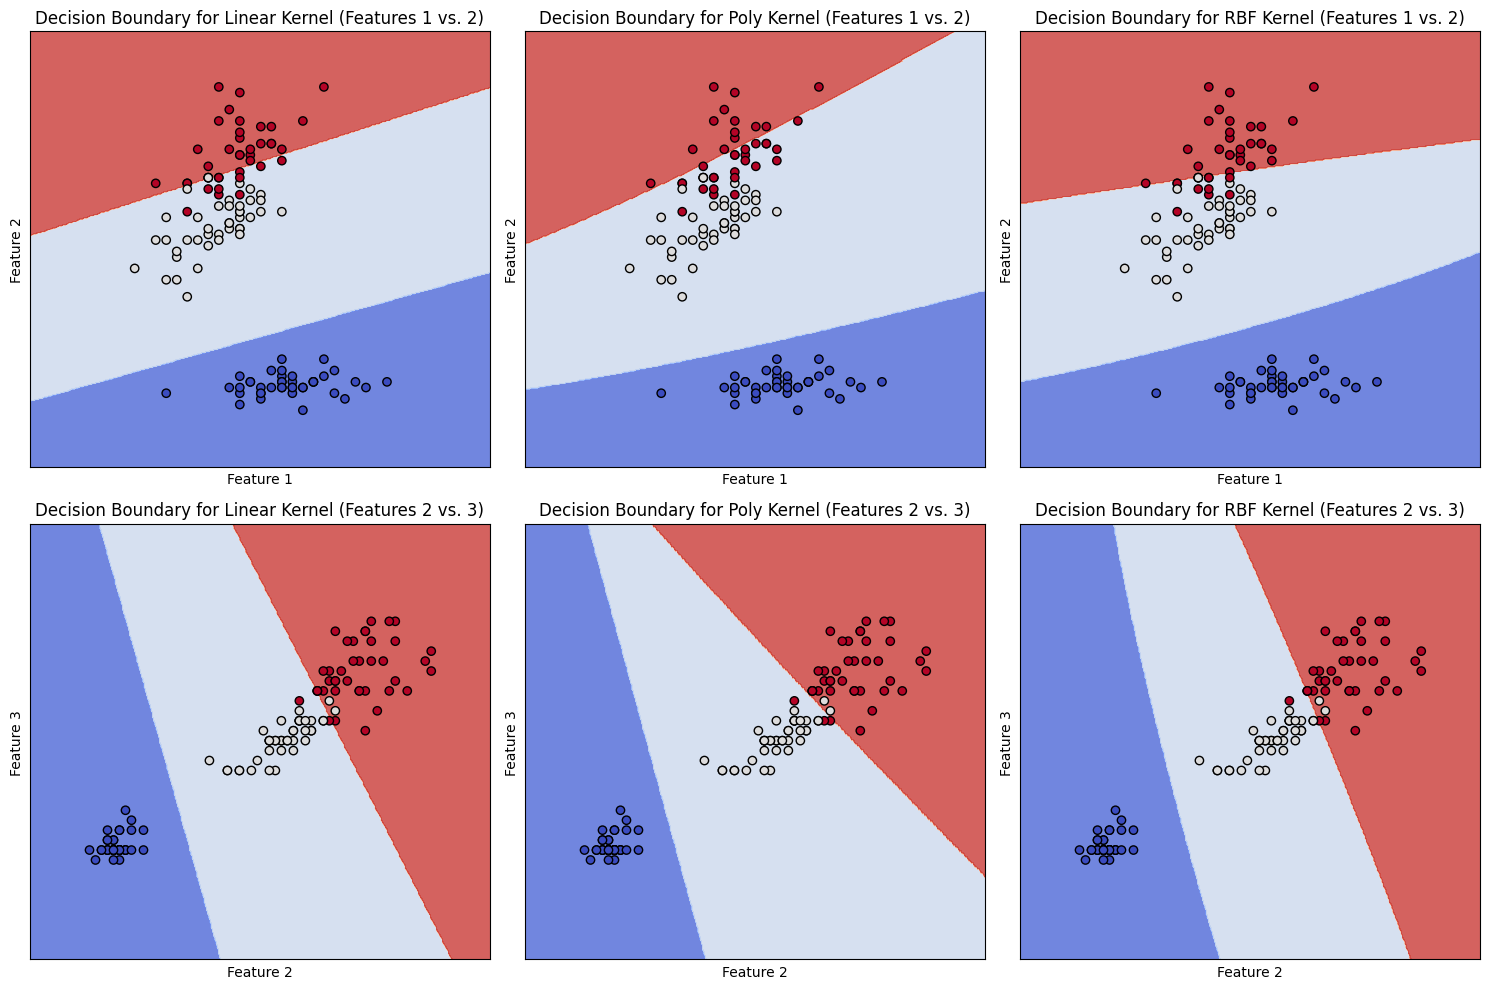

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def plot_svm_decision_boundary(model, X, y, ax=None):
    # Create a mesh grid for the feature space
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, feature_indices[0]].min() - 1, X[:, feature_indices[0]].max() + 1
    y_min, y_max = X[:, feature_indices[1]].min() - 1, X[:, feature_indices[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Prepare the input data: set non-plotted features to their mean values
    filler_values = np.nanmean(X, axis=0)
    data = np.full((xx.size, X.shape[1]), filler_values)
    for i in range(X.shape[1]):
        if i not in feature_indices:
            data[:, i] = filler_values[i]

    # Predict for each point in the mesh grid
    Z = model.decision_function(data)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    if ax is None:
        ax = plt.gca()

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, feature_indices[0]], X[:, feature_indices[1]], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.scatter(X[model.support_, feature_indices[0]], X[model.support_, feature_indices[1]],
               s=80, facecolors="none", zorder=10, edgecolors="k", label='Support Vectors')
    ax.set_xlabel(f'Feature {feature_indices[0]}')
    ax.set_ylabel(f'Feature {feature_indices[1]}')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend()

# List of trained classifiers
classifiers = [linear_1vRest, poly_1vRest, rbf_1vRest]
kernel_names = ["Linear", "Poly", "RBF"]
feature_pairs = [ [1, 2], [2, 3] ]

plt.figure(figsize=(15, 10))

for j, features in enumerate(feature_pairs):
    for i, (clf, kernel) in enumerate(zip(classifiers, kernel_names)):
        plt.subplot(2, 3, i + 1 + j * 3)
        plot_decision_boundary(clf, X_train, features)
        plt.title(f"Decision Boundary for {kernel} Kernel (Features {features[0]} vs. {features[1]})")

plt.tight_layout()
plt.show()